In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "IPAPGothic"

In [49]:
#データの読み込み
use_data = pd.read_csv(filepath_or_buffer="Datas/pickup_data.csv", encoding="utf_8", sep=",")
print(len(use_data))
use_data.info()

20000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
screen_name    20000 non-null object
user_id        20000 non-null float64
tweet_id       20000 non-null float64
tweet          20000 non-null object
tweet2         20000 non-null object
postdate       20000 non-null object
cos_day        20000 non-null float64
sin_day        20000 non-null float64
tag            20000 non-null object
image_url      20000 non-null object
image          20000 non-null int64
retweet        20000 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [50]:
#user_idの固有データの取り出し
nu = use_data['user_id'].unique()
print(nu)
#データフレームからuser_idを抽出
ids = use_data['user_id']
#0~31の数値へ変換
post_user = []
for i in ids:
    for j in range(len(nu)):
        if i == nu[j]:
            post_user.append(j)

#データフレームへ変換
s = pd.DataFrame(post_user, columns=['user_id2'])
use_data = use_data.join(s)

[2.84312922e+09 2.32480106e+09 1.33582577e+08 1.37168394e+09
 1.02971993e+09 8.52638190e+07 2.22008119e+08 1.96899097e+08
 2.75767513e+09 2.45955083e+09 2.70280216e+08 2.64482835e+08
 4.56310285e+09 7.60852304e+08 9.56572308e+08 1.61550679e+09
 1.73378242e+09 7.40050123e+17 1.02589448e+08 7.48485695e+17
 9.71187020e+07 7.58099901e+17 1.66203998e+09 1.29824840e+08
 5.82425732e+08 3.13971513e+09 5.43138610e+08 3.01089352e+09
 8.93037779e+17 9.45626465e+17 9.73451829e+17 9.95901925e+17]


In [51]:
#タグをあるかないかの2値に変換
def conversion_tag(x):
    if x is not "0":
        return 1
    else:
        return 0
    
use_data['tag2'] = use_data['tag'].apply(conversion_tag)
use_data.head()

,screen_name,user_id,tweet_id,tweet,tweet2,postdate,cos_day,sin_day,tag,image_url,image,retweet,user_id2,tag2
0,花巻市,2.843129e+09,6.714906e+17,固定資産税に関する各種申告等について 固定資産税は 毎年 月 日現在の資産の所有状況によ...,固定 資産 税 各種 申告 固定 資産 税 毎年 日 現在 資産 所有 状況 課税 該当 申...,2015-12-01,-0.493776,0.869589,0,0,0,0.0,0,0
1,花巻市,2.843129e+09,6.714914e+17,広報はなまき 平成 年 月 日号 広報はなまき 月 日号を発行しました ...,広報 平成 号 広報 まき 月 日 号 発行 内容 花巻 ホームページ ご覧,2015-12-01,-0.493776,0.869589,0,http://pbs.twimg.com/media/CVGd144U8AIKEes.jpg,1,0.0,0,0
2,遠野市観光協会/Tono Tourist,2.324801e+09,6.715386e+17,昨日のこと よし屋 さんで遅っそいお昼ご飯 落ち着いた雰囲気ののんびりできる喫茶店 です お...,昨日 屋 お昼 ご飯 雰囲気 喫茶店 お茶 近所 おば たち 会話 盗み聞き 基本 月 営業,2015-12-01,-0.493776,0.869589,"遠野,珈琲,よし屋,壺が出てたらお店あいてます",http://pbs.twimg.com/media/CVHI0LqUkAEfSlx.jpg...,1,0.0,1,1
3,さんてつくん @ 三陸鉄道【鉄ログ】,1.335826e+08,6.715527e+17,ランチｏｒスイーツ列車 ミ,ランチ or スイーツ 列車 ミ,2015-12-01,-0.493776,0.869589,0,http://pbs.twimg.com/media/CVHVqayVEAEna15.jpg,1,0.0,2,0
4,花巻市,2.843129e+09,6.716279e+17,ルンビニー苑利用者の方々からシクラメンをいただきました 花巻市石鳥谷町の障がい者支援施...,ルンビニー 苑 利用 方々 シクラメン 花巻 石鳥谷 支援 施設 ルンビニー 苑 施設 利用...,2015-12-01,-0.493776,0.869589,0,http://pbs.twimg.com/media/CVIaB-xU8AAcsiE.jpg...,1,0.0,0,0


In [53]:
use_data['postdate'] = pd.to_datetime(use_data['postdate'], format = '%Y-%m-%d')
use_data['date'] = use_data['postdate'].dt.dayofyear

In [55]:
use_data.drop(['screen_name','user_id', 'tweet_id', 'tweet', 'tweet2', 'postdate',
               'cos_day', 'sin_day', 'tag', 'image_url'], axis = 1, inplace=True)

In [56]:
use_data

,image,retweet,user_id2,tag2,date
0,0,0.0,0,0,335
1,1,0.0,0,0,335
2,1,0.0,1,1,335
3,1,0.0,2,0,335
4,1,0.0,0,0,335
5,0,0.0,3,0,335
6,1,0.0,4,0,336
7,0,0.0,5,1,336
8,0,0.0,5,1,336
9,0,0.0,2,0,336


In [57]:
datas = use_data.loc[:, ['user_id2', 'date', 'tag2', 'image', 'retweet']]

In [59]:
data = datas.corr()

In [60]:
data

,user_id2,date,tag2,image,retweet
user_id2,1.000000,0.006132,-0.138853,-0.090019,-0.064034
date,0.006132,1.000000,0.010113,-0.025437,0.031814
tag2,-0.138853,0.010113,1.000000,0.157428,0.164067
image,-0.090019,-0.025437,0.157428,1.000000,0.360797
retweet,-0.064034,0.031814,0.164067,0.360797,1.000000


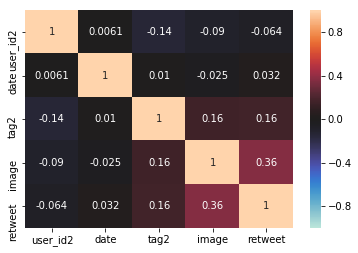

In [64]:
import seaborn as sns

sns.heatmap(data, vmax=1, vmin=-1, center=0, annot=True)

In [8]:
cross = pd.crosstab(use_data.screen_name,use_data.retweet)
print(cross)

retweet                0.0   1.0
screen_name                     
☆たかたのゆめちゃん☆（公式）        523   182
【花巻温泉公式キャラクター】フクロー      49   283
いわて花巻空港（公式）             88   574
おおふなトン【公式】             101    53
さんてつくん @ 三陸鉄道【鉄ログ】     119   229
ねまるべ遠野@はしご酒＆ジンギスカン       9    31
イーハトーブログ               257   821
ココよちゃん＠いわて【岩手の宿】      1652   267
一関市公式アカウント             118     8
伝承園                    159  1186
奥州市公式アカウント             124    15
岩手県                   1519     1
岩手県地域振興室               294   340
岩手県宮古市公式アカウント          332    61
岩手県広聴広報課               773  1809
岩手県東京事務所               143   134
岩手県盛岡広域振興局             130   498
岩手県警察交通部【公式】            85    87
川源ぶどう園(花巻市)              4     4
盛岡市                    325   418
花巻市                    801   944
花巻観光協会                 137   228
達増拓也 TASSO 希望郷いわて      708    55
遠野たかむろ水光園               15   186
遠野テレビ                  763     3
遠野市生涯現役いきいき促進協議会        42    61
遠野市観光協会/Tono Tourist   127   801
遠野物語を紐解く               539   543
遠野萌えキャラプロジ

In [27]:
cross = pd.crosstab(use_data.postdate,use_data.retweet)
print(cross[754:1119])

retweet     0.0  1.0
postdate            
2018-01-01    6    8
2018-01-02    1   10
2018-01-03    4   10
2018-01-04    4   15
2018-01-05    6   13
2018-01-06    6    7
2018-01-07    5    9
2018-01-08    7   11
2018-01-09    9   11
2018-01-10    8   14
2018-01-11    8   20
2018-01-12    9   25
2018-01-13    7   10
2018-01-14    6    2
2018-01-15   13   13
2018-01-16   11   21
2018-01-17   16   21
2018-01-18    9   22
2018-01-19   21   11
2018-01-20   11   13
2018-01-21    6    6
2018-01-22   13   17
2018-01-23   10   15
2018-01-24   10   15
2018-01-25   19   21
2018-01-26    6   29
2018-01-27    8   10
2018-01-28    8   13
2018-01-29    9   21
2018-01-30    8   15
...         ...  ...
2018-12-02    4    0
2018-12-03   20    0
2018-12-04   11    0
2018-12-05   17    0
2018-12-06    8    0
2018-12-07   10    0
2018-12-08    7    0
2018-12-09    4    0
2018-12-10    6    0
2018-12-11   18    1
2018-12-12   10    1
2018-12-13   11    2
2018-12-14   11    6
2018-12-15    5    0
2018-12-16   

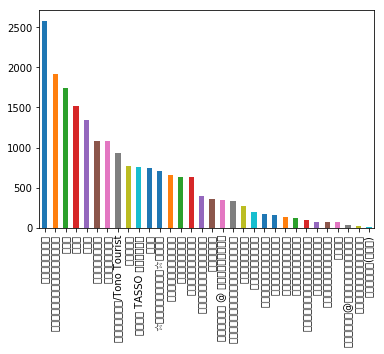

In [35]:
use_data['screen_name'].value_counts().plot.bar()